In [1]:
import nsfg
import numpy as np

from IPython.core import page
page.page = print

import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import thinkstats2
import thinkplot
import first

In [2]:
preg = nsfg.ReadFemPreg()
preg.head()

,caseid,pregordr,howpreg_n,howpreg_p,moscurrp,nowprgdk,pregend1,pregend2,nbrnaliv,multbrth,...,laborfor_i,religion_i,metro_i,basewgt,adj_mod_basewgt,finalwgt,secu_p,sest,cmintvw,totalwgt_lb
0,1,1,NaN,NaN,NaN,NaN,6.0,NaN,1.0,NaN,...,0,0,0,3410.389399,3869.349602,6448.271112,2,9,NaN,8.8125
1,1,2,NaN,NaN,NaN,NaN,6.0,NaN,1.0,NaN,...,0,0,0,3410.389399,3869.349602,6448.271112,2,9,NaN,7.8750
2,2,1,NaN,NaN,NaN,NaN,5.0,NaN,3.0,5.0,...,0,0,0,7226.301740,8567.549110,12999.542264,2,12,NaN,9.1250
3,2,2,NaN,NaN,NaN,NaN,6.0,NaN,1.0,NaN,...,0,0,0,7226.301740,8567.549110,12999.542264,2,12,NaN,7.0000
4,2,3,NaN,NaN,NaN,NaN,6.0,NaN,1.0,NaN,...,0,0,0,7226.301740,8567.549110,12999.542264,2,12,NaN,6.1875


In [3]:
live = preg[preg.outcome == 1]
live.head()

,caseid,pregordr,howpreg_n,howpreg_p,moscurrp,nowprgdk,pregend1,pregend2,nbrnaliv,multbrth,...,laborfor_i,religion_i,metro_i,basewgt,adj_mod_basewgt,finalwgt,secu_p,sest,cmintvw,totalwgt_lb
0,1,1,NaN,NaN,NaN,NaN,6.0,NaN,1.0,NaN,...,0,0,0,3410.389399,3869.349602,6448.271112,2,9,NaN,8.8125
1,1,2,NaN,NaN,NaN,NaN,6.0,NaN,1.0,NaN,...,0,0,0,3410.389399,3869.349602,6448.271112,2,9,NaN,7.8750
2,2,1,NaN,NaN,NaN,NaN,5.0,NaN,3.0,5.0,...,0,0,0,7226.301740,8567.549110,12999.542264,2,12,NaN,9.1250
3,2,2,NaN,NaN,NaN,NaN,6.0,NaN,1.0,NaN,...,0,0,0,7226.301740,8567.549110,12999.542264,2,12,NaN,7.0000
4,2,3,NaN,NaN,NaN,NaN,6.0,NaN,1.0,NaN,...,0,0,0,7226.301740,8567.549110,12999.542264,2,12,NaN,6.1875


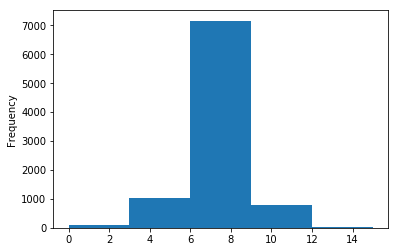

In [3]:
live['birthwgt_lb'].plot.hist(bins=5)

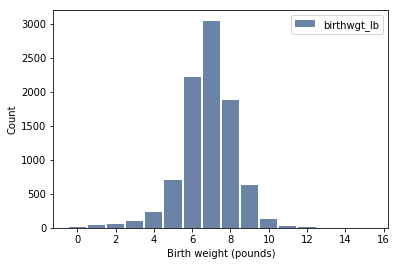

In [10]:
hist=thinkstats2.Hist(live.birthwgt_lb,label='birthwgt_lb')
thinkplot.Hist(hist)
thinkplot.Config(xlabel='Birth weight (pounds)',ylabel='Count')


In [23]:
n=hist.Total()
pmf=hist.Copy()
for x,freq in hist.Items():
    pmf[x]=freq/n

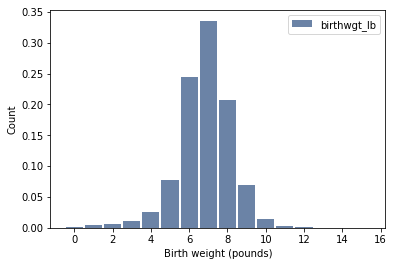

In [6]:
thinkplot.Hist(pmf)
thinkplot.config(xlabel='Birth weight (pounds)',ylabel='Count')

In [17]:
pmf=thinkstats2.Pmf([1,2,2,3,5])
pmf

Pmf({1: 0.2, 2: 0.4, 3: 0.2, 5: 0.2})

In [18]:
pmf.Prob(2)

0.4

In [19]:
pmf[2]

0.4

In [21]:
pmf.Incr(2,0.2)
pmf[2]


0.6000000000000001

In [23]:
pmf.Normalize()
pmf.Total()

1.0000000000000002

In [24]:
pmf=thinkstats2.Pmf(live.prglngth,label='prglngth')

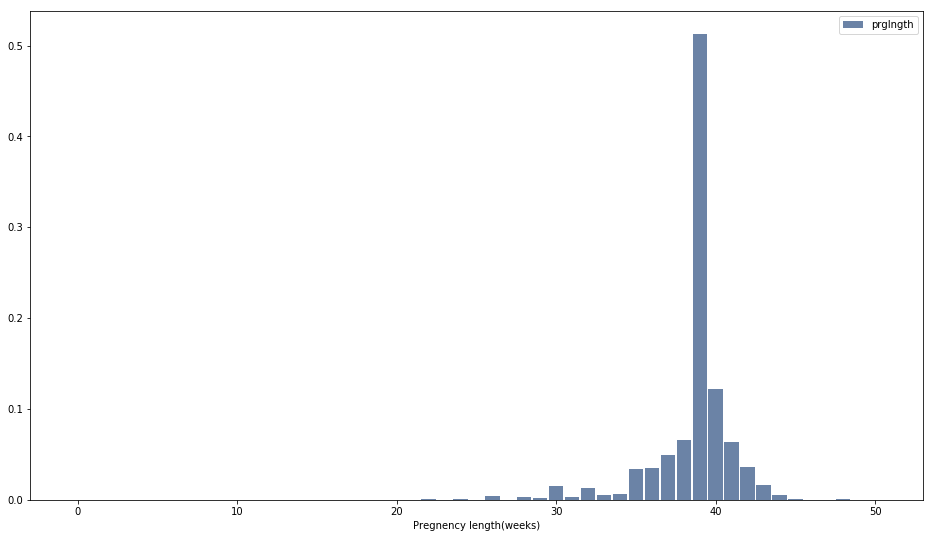

In [26]:
plt.figure(figsize=(16,9))
thinkplot.Hist(pmf)
thinkplot.Config(xlabel='Pregnency length(weeks)',ylabel='')

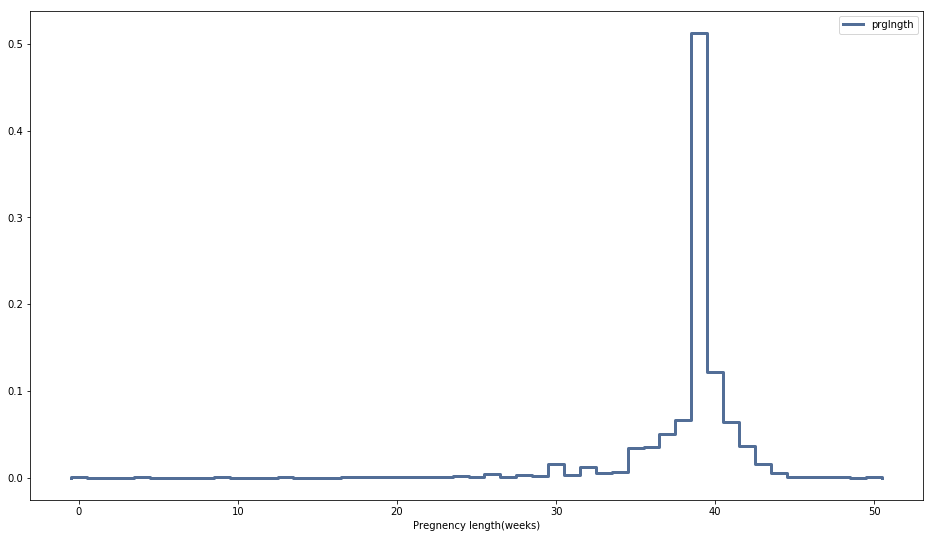

In [28]:
plt.figure(figsize=(16,9))
thinkplot.Pmf(pmf)
thinkplot.Config(xlabel='Pregnency length(weeks)',ylabel='')

In [27]:
live,firsts,others=first.MakeFrames()

In [28]:
first_pmf=thinkstats2.Pmf(firsts.prglngth,label='firsts')
other_pmf=thinkstats2.Pmf(others.prglngth,label='others')

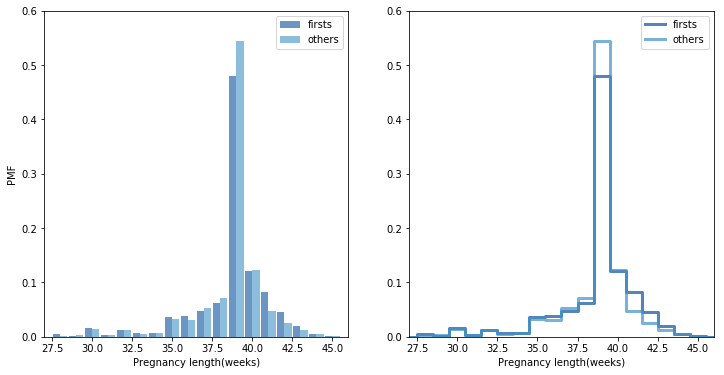

In [38]:
width=0.45
axis = [27, 46, 0, 0.6]
thinkplot.PrePlot(2, cols=2)
thinkplot.Hist(first_pmf, align='right', width=width)
thinkplot.Hist(other_pmf, align='left', width=width)
thinkplot.Config(xlabel='Pregnancy length(weeks)', ylabel='PMF', axis=axis)

thinkplot.PrePlot(2) # resets the color generator
thinkplot.SubPlot(2)
thinkplot.Pmfs([first_pmf, other_pmf])
thinkplot.Config(xlabel='Pregnancy length(weeks)', axis=axis)

NameError: name 'BiasPmf' is not defined

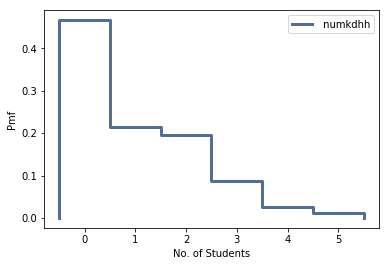

In [39]:
resp = nsfg.ReadFemResp()

pmf = thinkstats2.Pmf(resp.numkdhh , label = " numkdhh")

thinkplot.Pmf(pmf)
thinkplot.Config(xlabel="No. of Students",ylabel="Pmf")

biased = BiasPmf(pmf, label='biased')

thinkplot.PrePlot(2)
thinkplot.Pmfs([pmf, biased])
thinkplot.Config(xlabel='Number of children', ylabel='PMF')